In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [107]:
# Question 6:
#     d. Write a program that creates the NumPy array with a leading element of 0.e.
#        Fill the table with 100 numbers. Each number should be a sum of the
#        previous number and the value drawn from the set (-1, 1).
#     f. Create a graph based on the data in the table.
#     g. Find minimum and maximum values in the created array.
#     h. Simulate creating an array 50 times and see how many cases have managed
#     to exceed 30 in any given step. Illustrate the results on the graph.

Total of 1 random walk(s) exceeded 30


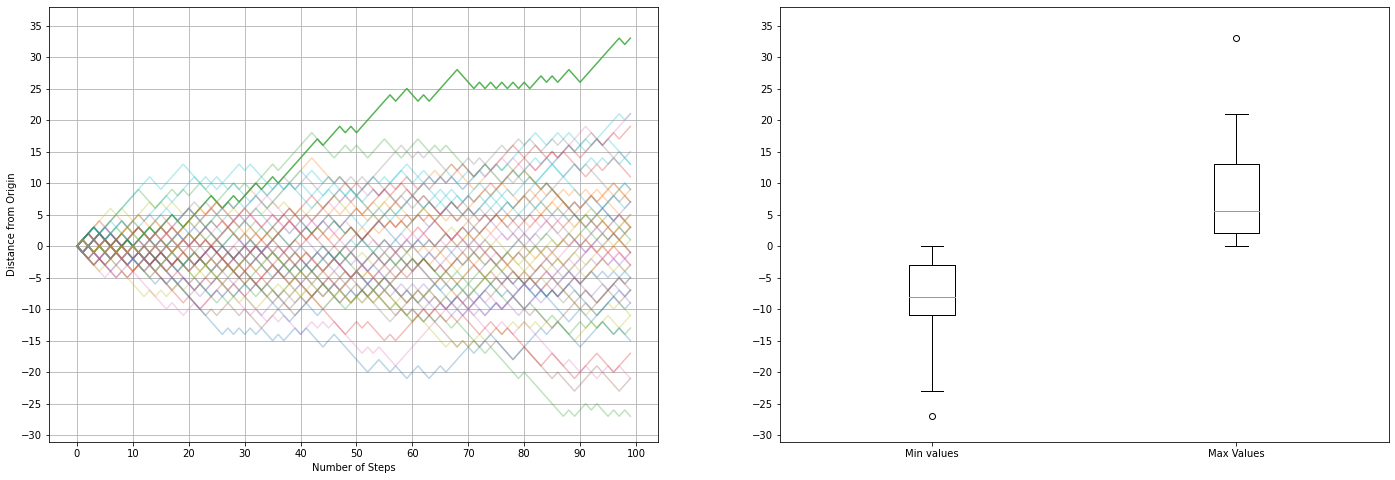

In [170]:
def create_array(n=100)-> list: # np.array()
    data = [0,]
    
    for i in range(n-1):
        value = data[i]
        random_step = np.random.choice([-1, 1])
        data.append(value + random_step)
    return np.array(data)

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Storing min and max values from each random_walk
min_values = []
max_values = []

for _ in range(50):
    arr = create_array()
    
    # Line is more visiable if exceeds 30
    alpha = 0.3 if arr.max() < 30 else 0.8

    min_values.append(arr.min())
    max_values.append(arr.max())
    
    axs[0].plot(arr, alpha=alpha)

# Creating 15% padding on each side
ylim = np.array([min(min_values), max(max_values)]) * 1.15
axs[0].set_ylim(ylim)

# Setting the labels
axs[0].set_ylabel('Distance from Origin')
axs[0].set_xlabel('Number of Steps')

# Creating grid line corresponding to multiples of 5
yticks_range = ylim + (5 - (ylim % 5))
major_yticks = np.arange(yticks_range[0], yticks_range[1], 5)
axs[0].set_yticks(major_yticks, minor=False)
axs[0].set_xticks(np.arange(0, 110, 10), minor=False)
axs[0].grid()

# Boxplot
axs[1].boxplot([min_values, max_values])

# Boxplot tick labels and axis label
axs[1].set_ylim(ylim)
axs[1].set_yticks(major_yticks, minor=False)
axs[1].set_xticklabels(['Min values', 'Max Values'])

exceeding = np.array(max_values)
exceeding = exceeding[exceeding > 30]

print(f'Total of {len(exceeding)} random walk(s) exceeded 30')

In [115]:
# Question 7:
#     i. Sort the data by population in descending order.
#     j. Move the “province capital” column to the last place.
#     k. Modify names of provinces so that they begin with a capital letter.
#     l. Create a series object containing names of provinces in the index and a
#        boolean value that indicates whether the average population per km2 is
#        greater than 140.
#     m. Delete the row containing „lubuskie” province.
#     n. Use pandas.DataFrame.describe() function and show statistical parameters
#        for the analyzed data set.

In [214]:
province = pd.Series(['dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie', 'łódzkie', 'małopolskie', 'mazowieckie', 'wielkopolskie'])
registerNr = pd.Series([2, 4, 6, 8, 10, 12, 14, 30])
province_capital = pd.Series(['Wrocław', 'Bydgoszcz / Toruń', 'Lublin', 'Gorzów Wielkopolski/Zielona Góra', 'Łódź', 'Kraków', 'Warszawa', 'Poznań'])
area = pd.Series([19_946.70, 17_971.34, 25_122.46, 13_987.93, 18_218.95, 15_182.79, 35_558.47, 29_826.50])
population = pd.Series([2_904_198, 1_086_210, 2_139_726, 1_018_084, 2_493_603, 3_372_618, 5_349_114, 3_475_323])

df = {'province': province, 'registerNr': registerNr, 'province_capital': province_capital, 'area': area, 'population': population}

df = pd.DataFrame(df)

In [215]:
df

province  registerNr                  province_capital      area  \
0        dolnośląskie           2                           Wrocław  19946.70   
1  kujawsko-pomorskie           4                 Bydgoszcz / Toruń  17971.34   
2           lubelskie           6                            Lublin  25122.46   
3            lubuskie           8  Gorzów Wielkopolski/Zielona Góra  13987.93   
4             łódzkie          10                              Łódź  18218.95   
5         małopolskie          12                            Kraków  15182.79   
6         mazowieckie          14                          Warszawa  35558.47   
7       wielkopolskie          30                            Poznań  29826.50   

   population  
0     2904198  
1     1086210  
2     2139726  
3     1018084  
4     2493603  
5     3372618  
6     5349114  
7     3475323

In [216]:
df.sort_values('population', ascending=False, inplace=True)
df

province  registerNr                  province_capital      area  \
6         mazowieckie          14                          Warszawa  35558.47   
7       wielkopolskie          30                            Poznań  29826.50   
5         małopolskie          12                            Kraków  15182.79   
0        dolnośląskie           2                           Wrocław  19946.70   
4             łódzkie          10                              Łódź  18218.95   
2           lubelskie           6                            Lublin  25122.46   
1  kujawsko-pomorskie           4                 Bydgoszcz / Toruń  17971.34   
3            lubuskie           8  Gorzów Wielkopolski/Zielona Góra  13987.93   

   population  
6     5349114  
7     3475323  
5     3372618  
0     2904198  
4     2493603  
2     2139726  
1     1086210  
3     1018084

In [217]:
cols = list(df.columns)
cols.remove('province_capital')
cols.append('province_capital')
cols

['province', 'registerNr', 'area', 'population', 'province_capital']

In [218]:
df = df[cols]
df

province  registerNr      area  population  \
6         mazowieckie          14  35558.47     5349114   
7       wielkopolskie          30  29826.50     3475323   
5         małopolskie          12  15182.79     3372618   
0        dolnośląskie           2  19946.70     2904198   
4             łódzkie          10  18218.95     2493603   
2           lubelskie           6  25122.46     2139726   
1  kujawsko-pomorskie           4  17971.34     1086210   
3            lubuskie           8  13987.93     1018084   

                   province_capital  
6                          Warszawa  
7                            Poznań  
5                            Kraków  
0                           Wrocław  
4                              Łódź  
2                            Lublin  
1                 Bydgoszcz / Toruń  
3  Gorzów Wielkopolski/Zielona Góra

In [219]:
df.province = df.province.str.capitalize()
df

province  registerNr      area  population  \
6         Mazowieckie          14  35558.47     5349114   
7       Wielkopolskie          30  29826.50     3475323   
5         Małopolskie          12  15182.79     3372618   
0        Dolnośląskie           2  19946.70     2904198   
4             Łódzkie          10  18218.95     2493603   
2           Lubelskie           6  25122.46     2139726   
1  Kujawsko-pomorskie           4  17971.34     1086210   
3            Lubuskie           8  13987.93     1018084   

                   province_capital  
6                          Warszawa  
7                            Poznań  
5                            Kraków  
0                           Wrocław  
4                              Łódź  
2                            Lublin  
1                 Bydgoszcz / Toruń  
3  Gorzów Wielkopolski/Zielona Góra

In [220]:
avg_pop = (df.population / df.area) > 140
avg_pop.index = df.province
avg_pop

province
Mazowieckie            True
Wielkopolskie         False
Małopolskie            True
Dolnośląskie           True
Łódzkie               False
Lubelskie             False
Kujawsko-pomorskie    False
Lubuskie              False
dtype: bool

In [222]:
df = df.loc[df.province != 'Lubuskie']
df

province  registerNr      area  population   province_capital
6         Mazowieckie          14  35558.47     5349114           Warszawa
7       Wielkopolskie          30  29826.50     3475323             Poznań
5         Małopolskie          12  15182.79     3372618             Kraków
0        Dolnośląskie           2  19946.70     2904198            Wrocław
4             Łódzkie          10  18218.95     2493603               Łódź
2           Lubelskie           6  25122.46     2139726             Lublin
1  Kujawsko-pomorskie           4  17971.34     1086210  Bydgoszcz / Toruń

In [225]:
df.describe(include=[np.number])

registerNr          area    population
count    7.000000      7.000000  7.000000e+00
mean    11.142857  23118.172857  2.974399e+06
std      9.370674   7385.804258  1.325821e+06
min      2.000000  15182.790000  1.086210e+06
25%      5.000000  18095.145000  2.316664e+06
50%     10.000000  19946.700000  2.904198e+06
75%     13.000000  27474.480000  3.423970e+06
max     30.000000  35558.470000  5.349114e+06

In [236]:
str_cols = df.select_dtypes('object')
df.describe(exclude=[np.number])

province province_capital
count             7                7
unique            7                7
top     Małopolskie           Kraków
freq              1                1